# 8

## a

In [1]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots

In [2]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

In [3]:
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)

In [4]:
auto = load_data("Auto")

In [5]:
design = MS(["horsepower"])
X = design.fit_transform(auto)
y = auto["mpg"]
model = sm.OLS(y, X)
result_horsepower = model.fit()

In [6]:
summarize(result_horsepower)

,coef,std err,t,P>|t|
intercept,39.9359,0.717,55.660,0.0
horsepower,-0.1578,0.006,-24.489,0.0


### (i)
Yes, since the f-statistic is low for horse power

### (ii)
RSE tells us the percentage error.
Here we see a percentage RSE error of 20.9 %

r2 tells us the percentage of variability in the response by the predictor.
Here we see that `horsepower` explains roughly 60 % of variability in `mpg`

In [7]:
mean_y = np.mean(y)

In [8]:
RSE = np.sqrt(result_horsepower.scale)

In [9]:
RSE

4.90575691954594

In [10]:
(RSE / mean_y) * 100

20.923714066914833

In [11]:
r2 = result_horsepower.rsquared

In [12]:
r2

0.6059482578894348

### (iii)
From the graph below we can see clearly that the relationship between the predictor and response is negative.

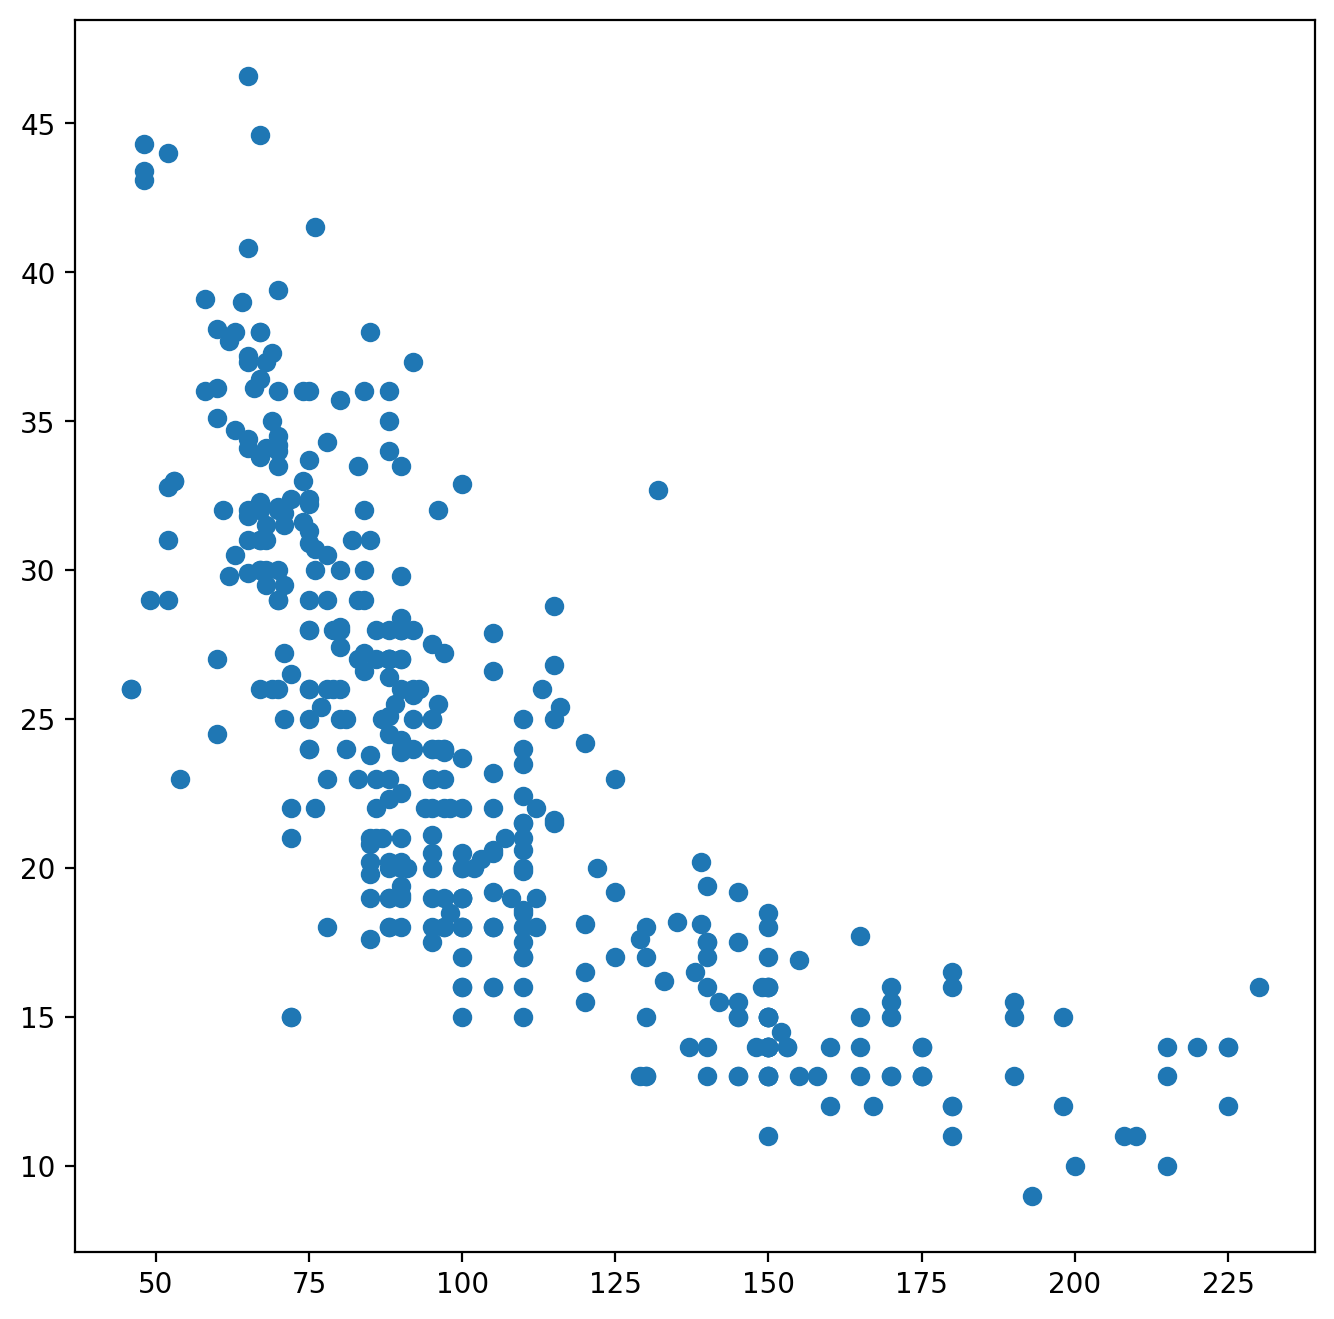

In [13]:
ax = subplots(figsize=(8,8), dpi=200)[1]
ax.scatter(X["horsepower"], y)

### (iv) 

In [14]:
new_df = pd.DataFrame({"horsepower": [150, 200, 250]})
newX = design.transform(new_df)
preds = result_horsepower.get_prediction(newX)

In [15]:
conf_interval = preds.conf_int(alpha=0.05)

In [16]:
conf_interval


array([[15.5040252 , 17.01427684],
       [ 7.06198454,  9.67184416],
       [-1.43278173,  2.3821371 ]])

In [17]:
pred_interval = preds.conf_int(obs=True, alpha=0.05)

In [18]:
pred_interval

array([[ 6.58459756, 25.93370448],
       [-1.36599947, 18.09982817],
       [-9.35716706, 10.30652243]])

## b

In [19]:
result_horsepower.params

intercept     39.935861
horsepower    -0.157845
dtype: float64

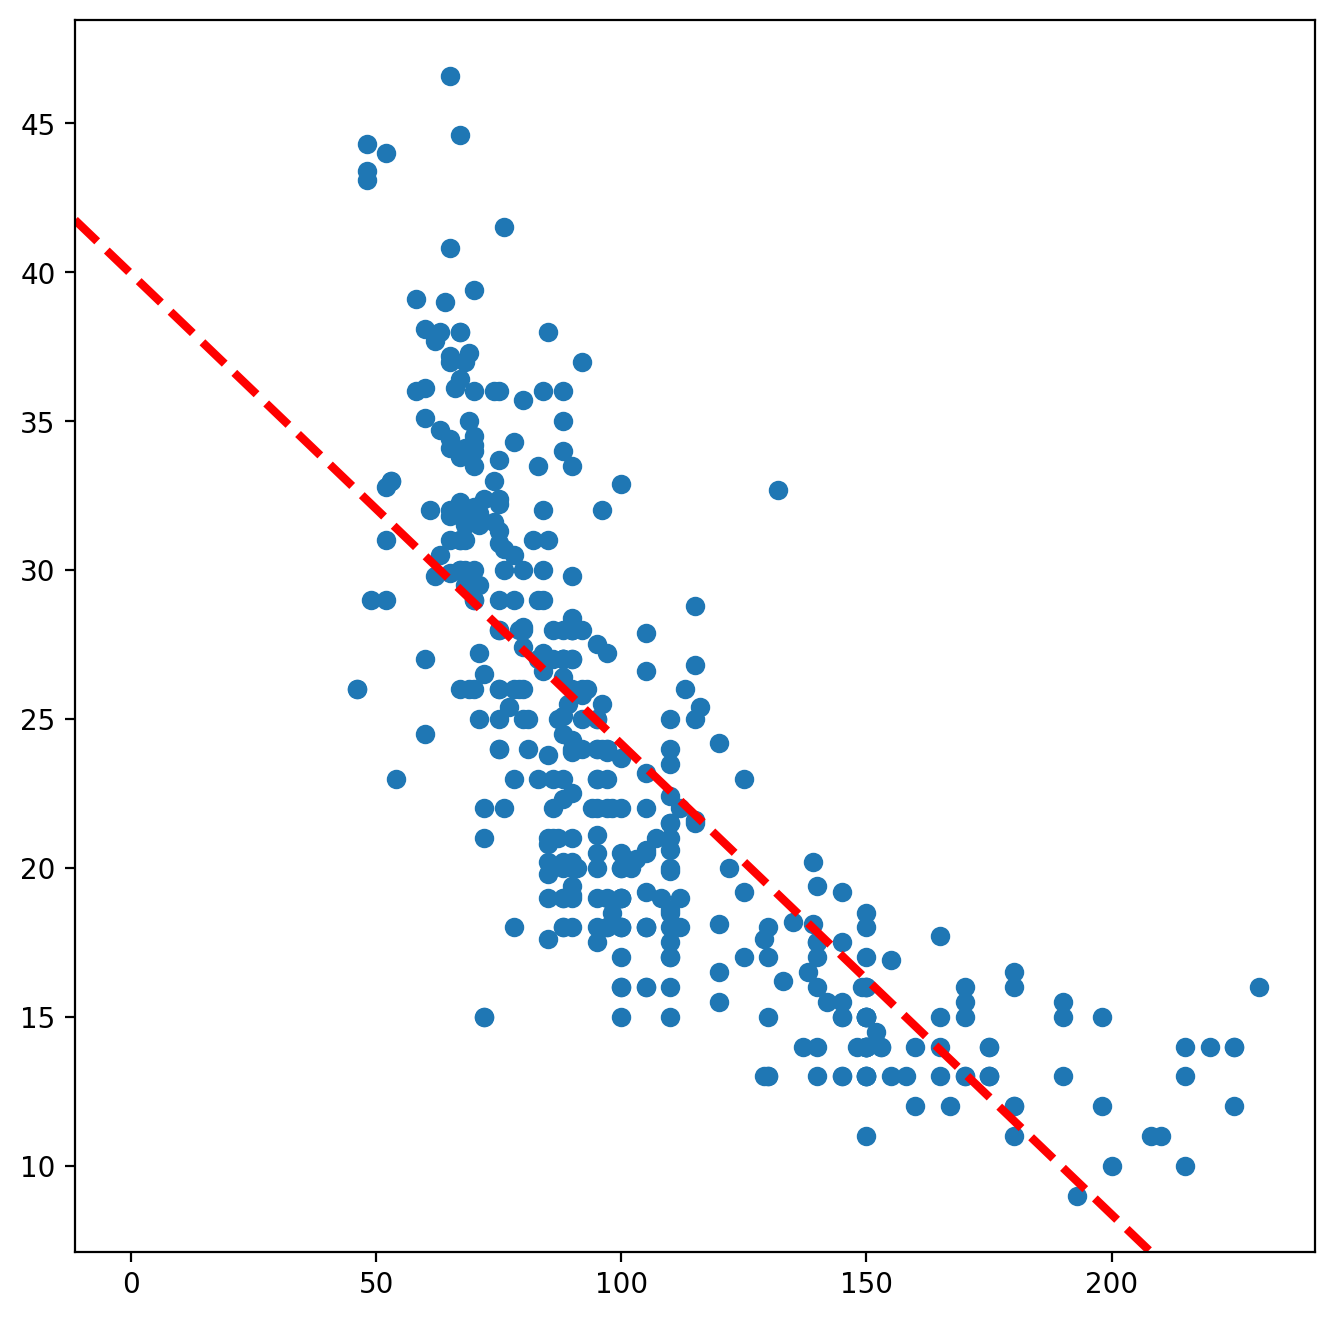

In [20]:
ax = subplots(figsize=(8,8), dpi=200)[1]
ax.scatter(X["horsepower"], y)
ax.axline(xy1=(0, result_horsepower.params[0]), slope=result_horsepower.params[1], color="r", linestyle="--", linewidth=3)

## (c)
We can notice a pattern in residual plot which shows us that some non-linear relationship exists.

There's np leverage points

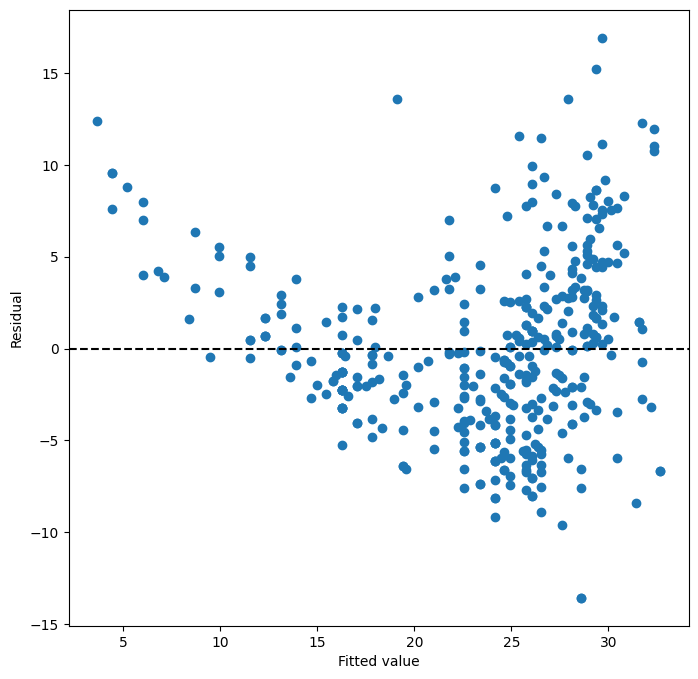

In [21]:
ax = subplots(figsize=(8, 8))[1]
ax.scatter(result_horsepower.fittedvalues, result_horsepower.resid)
ax.set_xlabel("Fitted value")
ax.set_ylabel("Residual")
ax.axhline(0, c="k", ls="--")

115

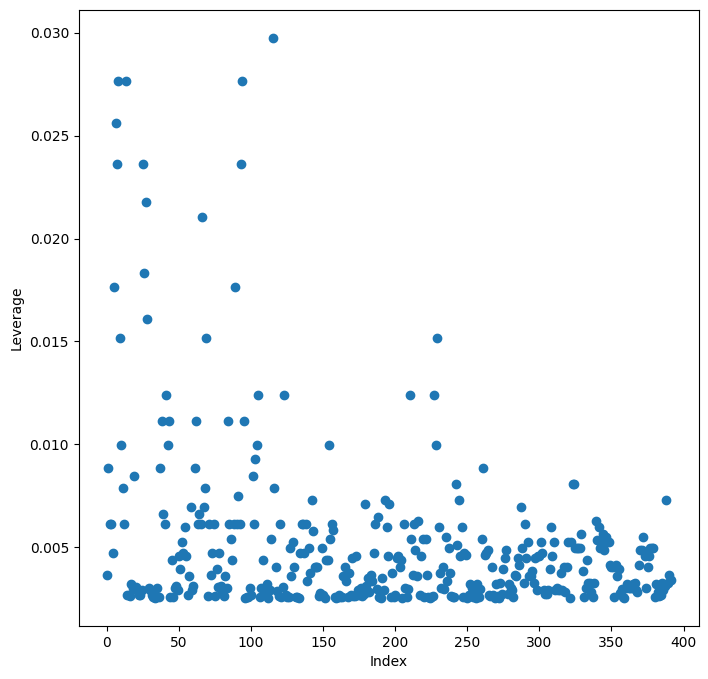

In [22]:
leverage_points = result_horsepower.get_influence()
ax = subplots(figsize=(8, 8))[1]
ax.scatter(np.arange(X.shape[0]), leverage_points.hat_matrix_diag)
ax.set_xlabel("Index")
ax.set_ylabel("Leverage")
np.argmax(leverage_points.hat_matrix_diag)

# 9.

## (a)

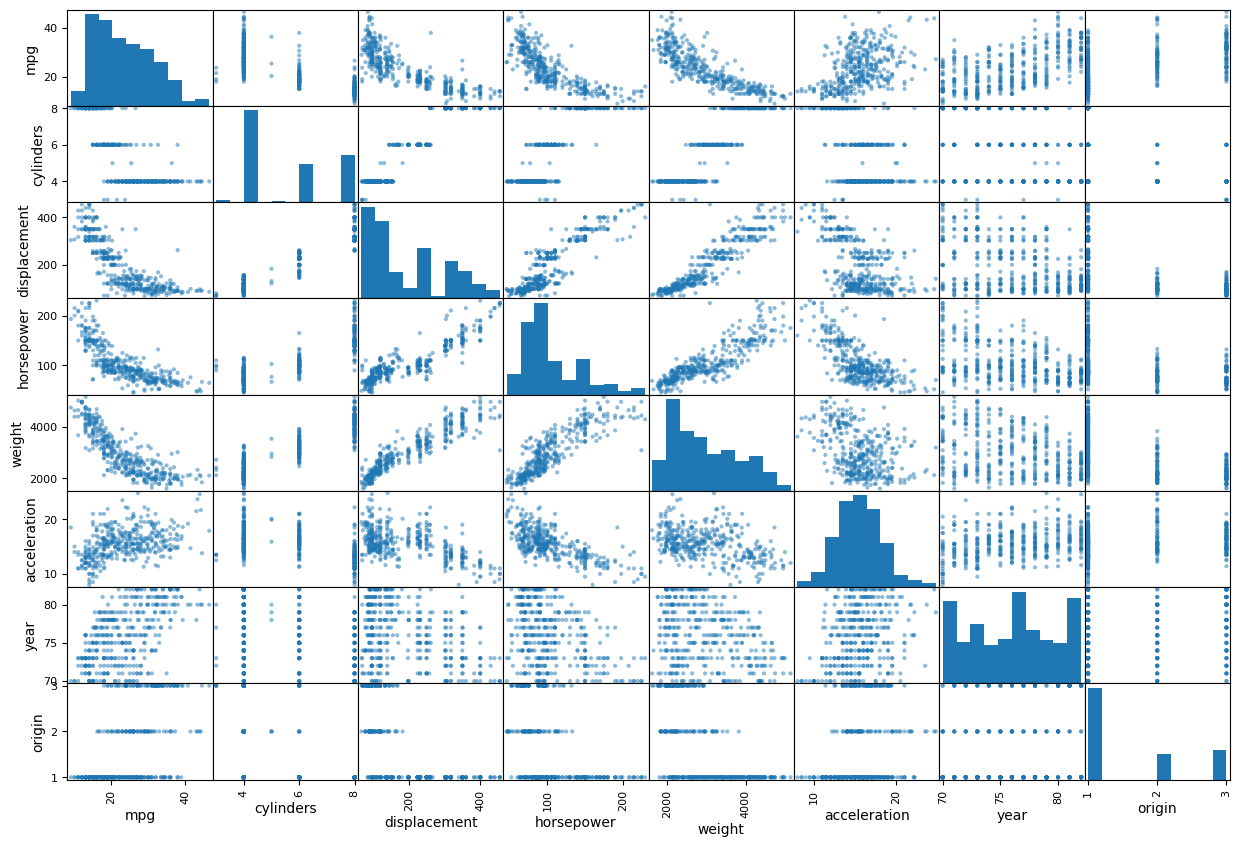

In [23]:
pd.plotting.scatter_matrix(auto, figsize=(15,10));

## (b)

In [24]:
auto.corr()

/tmp/ipykernel_5582/668445388.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  auto.corr()


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [25]:
design = MS(auto.drop(["name", "mpg"], axis=1))
X = design.fit_transform(auto)
y = auto["mpg"]
model_1 = sm.OLS(y, X)
result_all = model_1.fit()
summarize(result_all)

,coef,std err,t,P>|t|
intercept,-17.2184,4.644,-3.707,0.000
cylinders,-0.4934,0.323,-1.526,0.128
displacement,0.0199,0.008,2.647,0.008
horsepower,-0.0170,0.014,-1.230,0.220
weight,-0.0065,0.001,-9.929,0.000
acceleration,0.0806,0.099,0.815,0.415
year,0.7508,0.051,14.729,0.000
origin,1.4261,0.278,5.127,0.000


## (c)

### (i)

In [26]:
anova_lm(result_horsepower, result_all)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,390.0,9385.915872,0.0,NaN,NaN,NaN
1,384.0,4252.212530,6.0,5133.703341,77.267308,5.376746e-63


### (ii)

All variables except `cylinders`, `displacement`, `horsepower`

### (iii)

This means with every increase in year, the mpg increases by 0.75

## d
We see a pattern in the residual plot which suggests that there might be a non-linea relationship

We can see that the value in index 13 has high residual as well as high leverage which suggests that it might affect the predictions

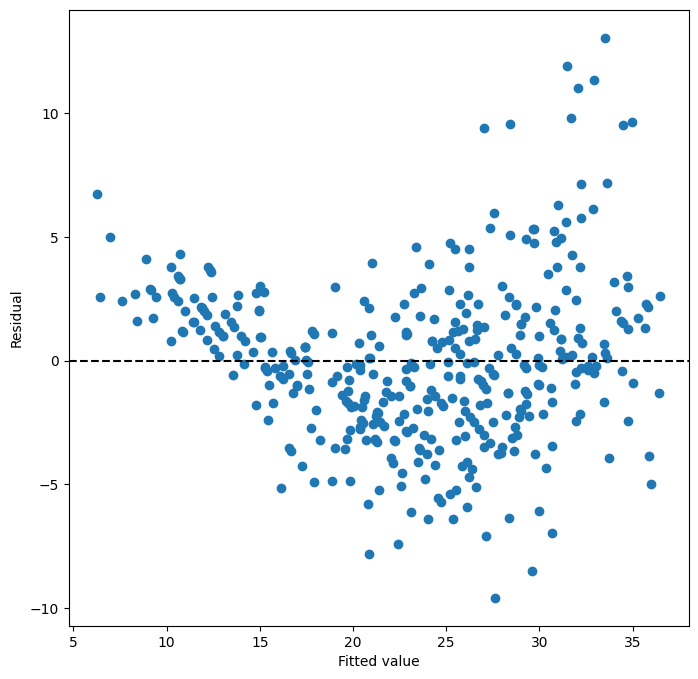

In [27]:
ax = subplots(figsize=(8, 8))[1]
ax.scatter(result_all.fittedvalues, result_all.resid)
ax.set_xlabel("Fitted value")
ax.set_ylabel("Residual")
ax.axhline(0, c="k", ls="--")

13

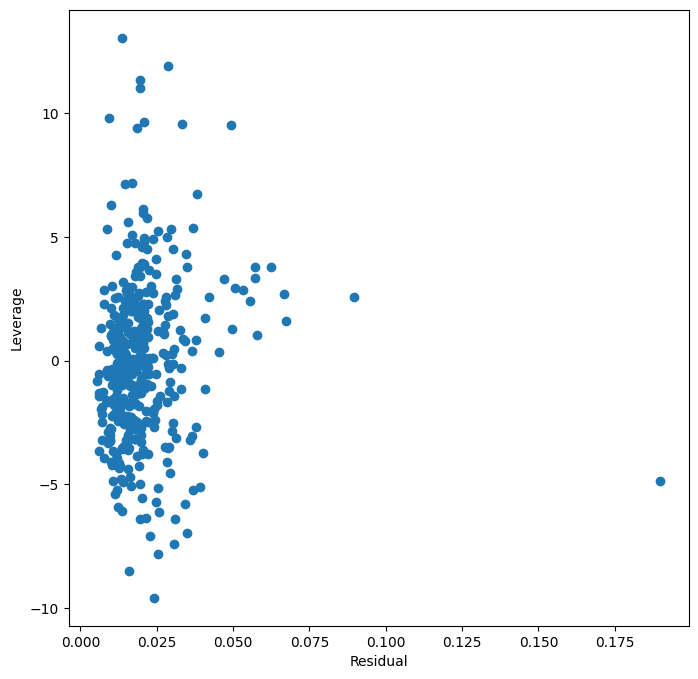

In [28]:
leverage_points = result_all.get_influence()
ax = subplots(figsize=(8, 8))[1]
ax.scatter(leverage_points.hat_matrix_diag, result_all.resid)
ax.set_xlabel("Residual")
ax.set_ylabel("Leverage")
np.argmax(leverage_points.hat_matrix_diag)

13

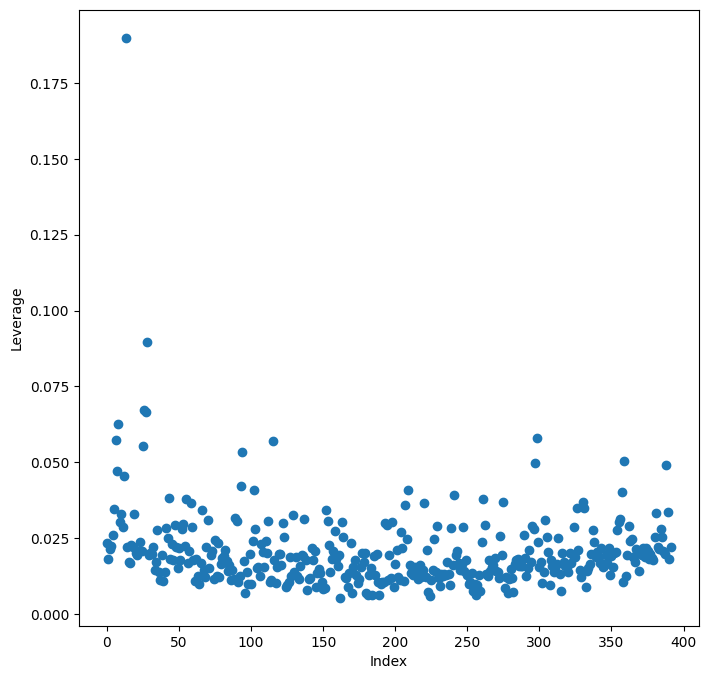

In [29]:
leverage_points = result_all.get_influence()
ax = subplots(figsize=(8, 8))[1]
ax.scatter(np.arange(X.shape[0]), leverage_points.hat_matrix_diag)
ax.set_xlabel("Index")
ax.set_ylabel("Leverage")
np.argmax(leverage_points.hat_matrix_diag)

In [30]:
design = MS(["cylinders",
             "displacement",
             "horsepower",
             "weight",
             "acceleration",
             "year",
             "origin",
             ("horsepower", "weight"), 
             ("horsepower", "displacement"), 
             ("weight", "displacement")])
X = design.fit_transform(auto)
y = auto["mpg"]
model_2 = sm.OLS(y, X)
result_all_interaction = model_2.fit()
summarize(result_all_interaction)

,coef,std err,t,P>|t|
intercept,-0.040700,4.679000,-0.009,0.993
cylinders,0.456300,0.317000,1.440,0.151
displacement,-0.062100,0.024000,-2.601,0.010
horsepower,-0.183200,0.047000,-3.866,0.000
weight,-0.006700,0.002000,-4.309,0.000
acceleration,-0.141600,0.098000,-1.452,0.147
year,0.756300,0.045000,16.835,0.000
origin,0.622000,0.264000,2.360,0.019
horsepower:weight,0.000014,0.000015,0.927,0.354
horsepower:displacement,0.000300,0.000096,3.252,0.001


From the above sumamry we can see that `displacement:horsepower` as significant effect on the prediction

In [31]:
X = MS([poly("horsepower", degree=2), "year"]).fit_transform(auto)
model3 = sm.OLS(y, X)
results3 = model3.fit()
summarize(results3)

,coef,std err,t,P>|t|
intercept,-29.2975,4.264,-6.871,0.0
"poly(horsepower, degree=2)[0]",-99.0845,4.079,-24.291,0.0
"poly(horsepower, degree=2)[1]",46.5061,3.713,12.525,0.0
year,0.6942,0.056,12.382,0.0


# 10

## a

In [32]:
carseats = load_data("Carseats")

In [33]:
design = MS(["Price", "Urban", "US"])
X = design.fit_transform(carseats)
y = carseats["Sales"]
model_4 = sm.OLS(y, X)
results_carseats = model_4.fit()
summarize(results_carseats)

,coef,std err,t,P>|t|
intercept,13.0435,0.651,20.036,0.000
Price,-0.0545,0.005,-10.389,0.000
Urban[Yes],-0.0219,0.272,-0.081,0.936
US[Yes],1.2006,0.259,4.635,0.000


## (b)

`price` - a decrease of sales by 0.0545 with increase in price

`Urban` - a decrease of sales by 0.0219 if present in `Urban` but no evidence as the p value is low

`US` - an increas of sales by 1.2006 if present in `US`

## (c)

sales = 13.0435 - (0.0545 * Price) - (0.0219 * Urban) + (1.2006 * US)

## (d)
We can reject the null hypothesis for `price` and `US` but not for `Urban` as the p-value is high

## (e)

In [34]:
design = MS(["Price", "US"])
X = design.fit_transform(carseats)
y = carseats["Sales"]
model_5 = sm.OLS(y, X)
resuls_small = model_5.fit()
summarize(resuls_small)

,coef,std err,t,P>|t|
intercept,13.0308,0.631,20.652,0.0
Price,-0.0545,0.005,-10.416,0.0
US[Yes],1.1996,0.258,4.641,0.0


 ## (f)

In [35]:
RSE_big = np.sqrt(results_carseats.scale)
RSE_small = np.sqrt(resuls_small.scale)

In [36]:
RSE_big, RSE_small

(2.4724924402701642, 2.469396800574444)

In [37]:
r2_big = results_carseats.rsquared

In [38]:
r2_small = resuls_small.rsquared

In [39]:
r2_big, r2_small

(0.23927539218405547, 0.23926288842678567)

## (e)

In [40]:
conf_big = results_carseats.conf_int(alpha=0.05)

In [41]:
conf_small = resuls_small.conf_int(alpha=0.05)

In [42]:
conf_big, conf_small

(                    0          1
 intercept   11.763597  14.323341
 Price       -0.064764  -0.044154
 Urban[Yes]  -0.555973   0.512141
 US[Yes]      0.691304   1.709841,
                   0          1
 intercept  11.79032  14.271265
 Price      -0.06476  -0.044195
 US[Yes]     0.69152   1.707766)

## (h)
Data point 42 has high leverage as well is an outlier

42

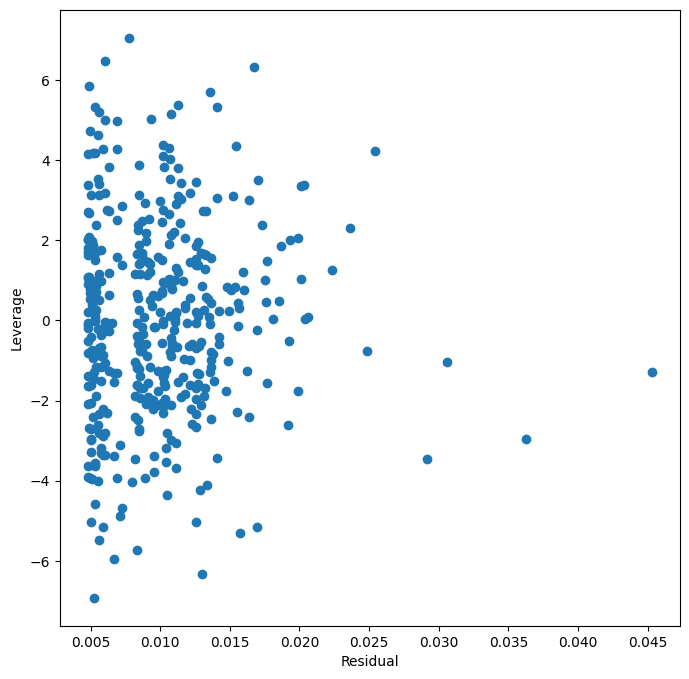

In [43]:
leverage_points = results_carseats.get_influence()
ax = subplots(figsize=(8, 8))[1]
ax.scatter(leverage_points.hat_matrix_diag, results_carseats.resid)
ax.set_xlabel("Residual")
ax.set_ylabel("Leverage")
np.argmax(leverage_points.hat_matrix_diag)

42

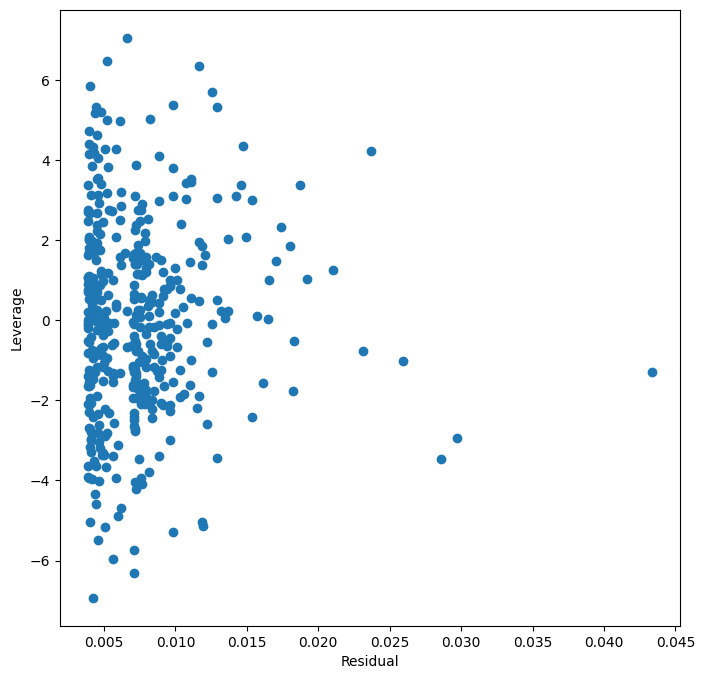

In [44]:
leverage_points = resuls_small.get_influence()
ax = subplots(figsize=(8, 8))[1]
ax.scatter(leverage_points.hat_matrix_diag, resuls_small.resid)
ax.set_xlabel("Residual")
ax.set_ylabel("Leverage")
np.argmax(leverage_points.hat_matrix_diag)

# 11

## (a)

In [66]:
rng = np.random.default_rng(1)
X = rng.normal(size=100)
y = 2 * X + rng.normal(size=100)

In [67]:
model_6 = sm.OLS(X, y)
result_no_intercept = model_6.fit()
summarize(result_no_intercept)


,coef,std err,t,P>|t|
x1,0.3757,0.022,16.898,0.0


In [68]:
model_7 = sm.OLS(y, X)
result_no_intercept_x_on_y = model_7.fit()
summarize(result_no_intercept_x_on_y)


,coef,std err,t,P>|t|
x1,1.9762,0.117,16.898,0.0


## (f)

In [72]:
X_y = pd.DataFrame({"x1": X, "y": y})

In [76]:
X_transformed = MS(["x1"]).fit_transform(X_y)
y = X_y["y"]
model_7 = sm.OLS(y, X_transformed)
result_intercept_y_on_x = model_7.fit()
summarize(result_intercept_y_on_x)


,coef,std err,t,P>|t|
intercept,-0.0760,0.101,-0.756,0.451
x1,1.9686,0.118,16.734,0.000


In [80]:
y_transformed = MS(["y"]).fit_transform(X_y)
X = X_y["x1"]
model_8 = sm.OLS(X, y_transformed)
result_intercept_x_on_y = model_8.fit()
summarize(result_intercept_x_on_y)

,coef,std err,t,P>|t|
intercept,0.0095,0.044,0.216,0.829
y,0.3763,0.022,16.734,0.000


# 13

In [81]:
rng = np.random.default_rng(1)

## (a)

In [83]:
X = rng.normal(loc=0, scale=1, size=100)

## (b)

In [84]:
eps = rng.normal(loc=0, scale=0.25, size=100)

## (c)

In [85]:
Y = -1 + (0.5 * X) + eps

In [87]:
len(Y)

100

B_0 = -1

B_1 = 0.5

## (d)

Text(0, 0.5, 'y')

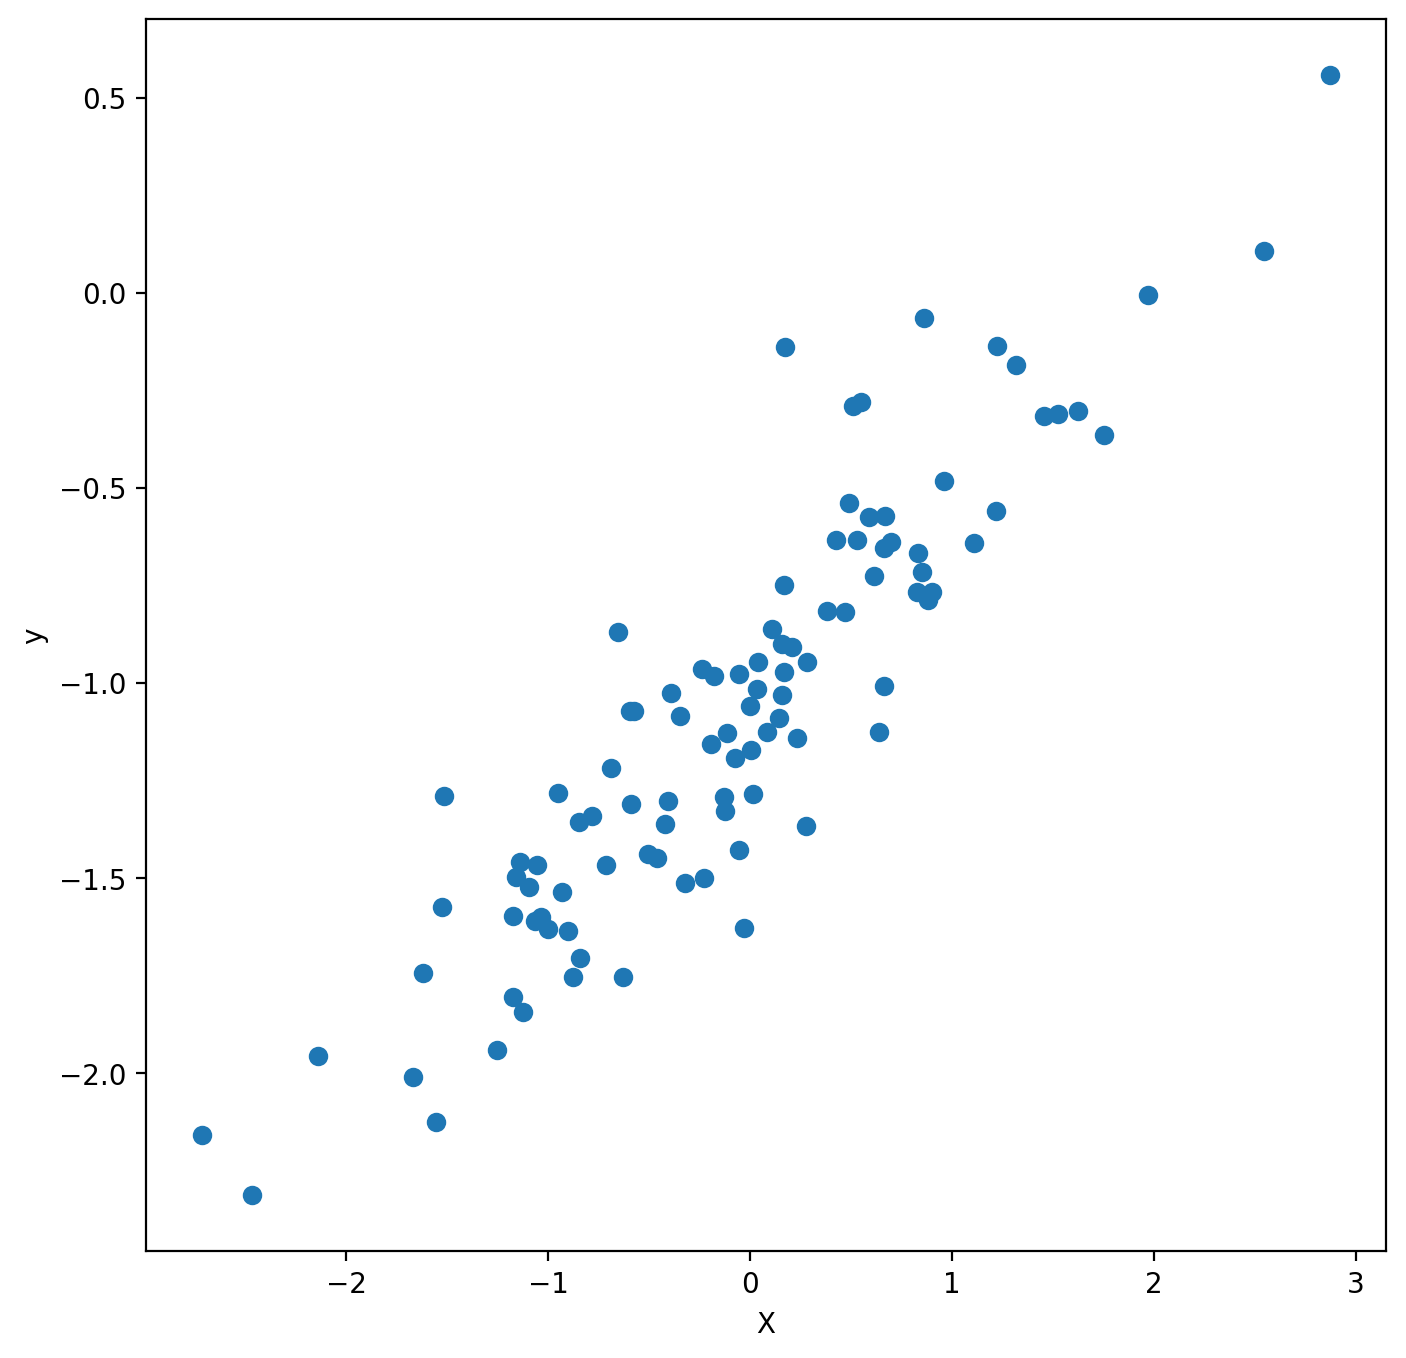

In [88]:
ax = subplots(figsize=(8, 8), dpi=200)[1]
ax.scatter(X, Y)
ax.set_xlabel("X")
ax.set_ylabel("y")

In [89]:
gen_df = pd.DataFrame({"x": X,
                       "y": Y})

## (e)

In [90]:
X_transformed = MS(["x"]).fit_transform(gen_df)
y = gen_df["y"]
model_9 = sm.OLS(y, X_transformed)
result_gen = model_9.fit()
summarize(result_gen)

,coef,std err,t,P>|t|
intercept,-1.0405,0.023,-45.004,0.0
x,0.4965,0.023,21.364,0.0


## (f)

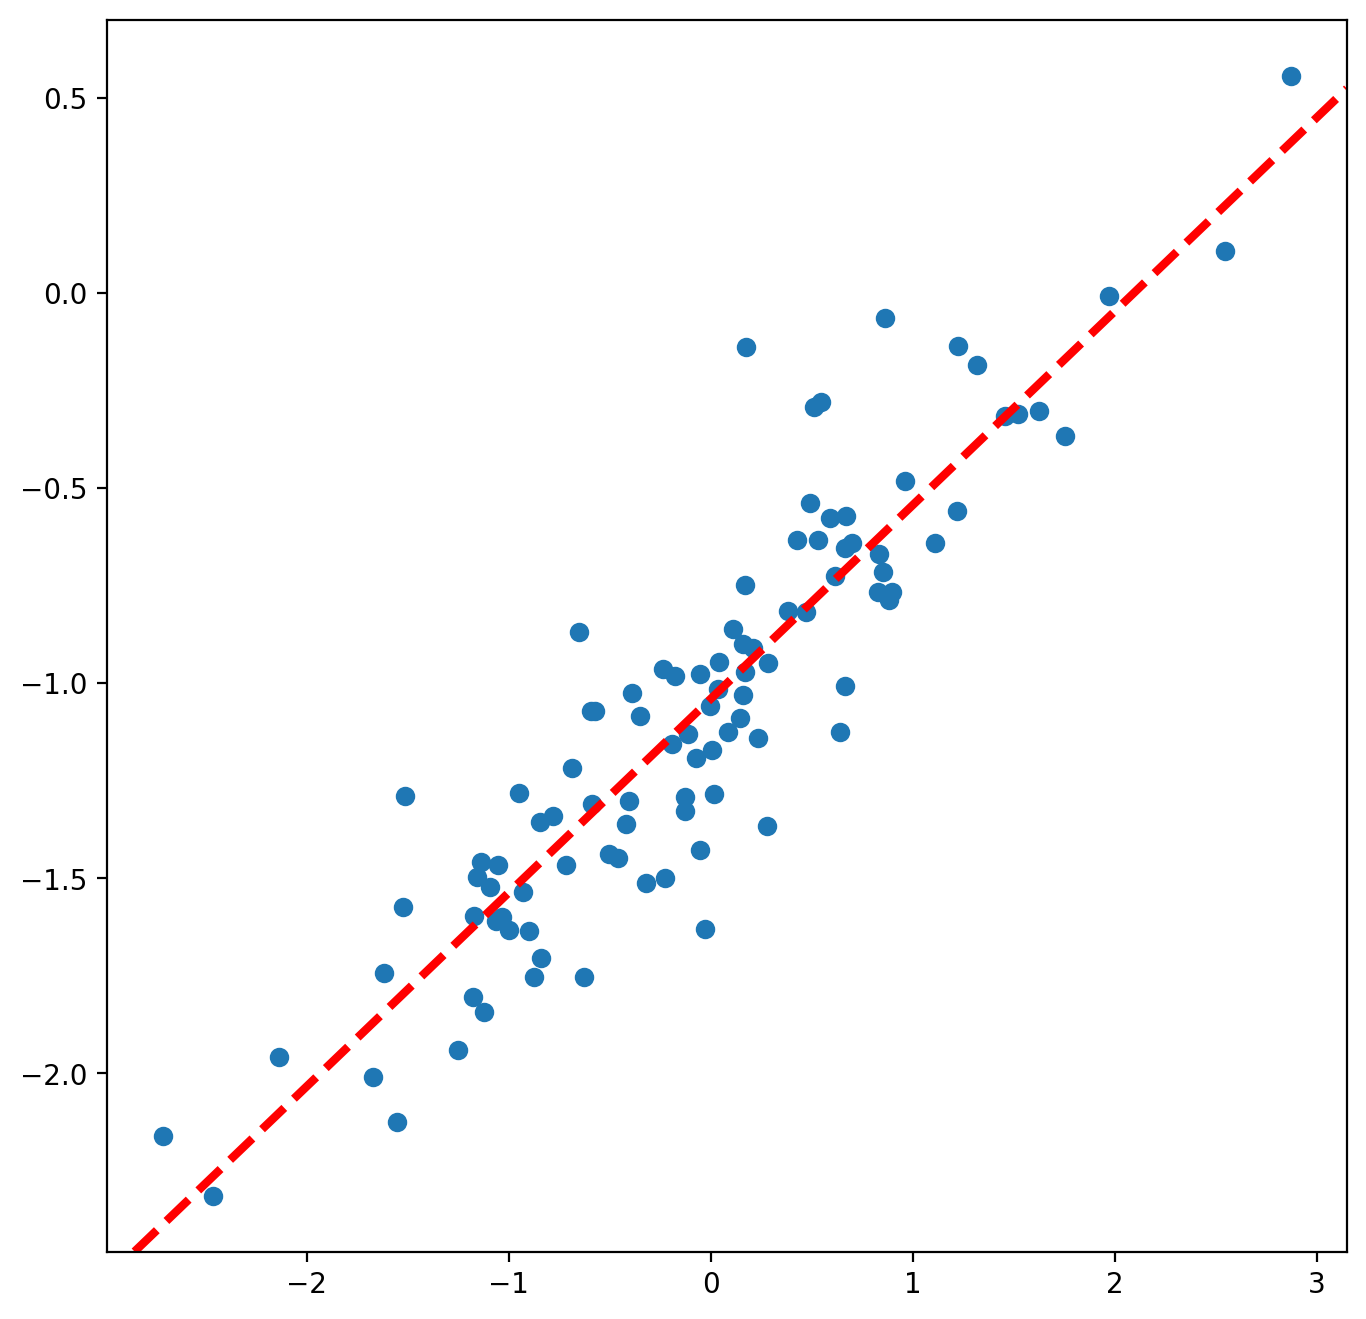

In [91]:
ax = subplots(figsize=(8,8), dpi=200)[1]
ax.scatter(gen_df["x"], y)
ax.axline(xy1=(0, result_gen.params[0]), slope=result_gen.params[1], color="r", linestyle="--", linewidth=3)

## (g)

In [92]:
X = MS([poly("x", degree=2)]).fit_transform(gen_df)
y = gen_df["y"]
model_10 = sm.OLS(y, X)
result_gen_poly = model_10.fit()
summarize(result_gen_poly)

,coef,std err,t,P>|t|
intercept,-1.0771,0.023,-46.636,0.000
"poly(x, degree=2)[0]",4.9259,0.231,21.328,0.000
"poly(x, degree=2)[1]",0.1884,0.231,0.816,0.417


In [93]:
anova_lm(result_gen, result_gen_poly)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,98.0,5.209812,0.0,NaN,NaN,NaN
1,97.0,5.174301,1.0,0.035511,0.665699,0.416554


There is no enough evidence that states that polynomial regression model performs better than linear model as `F` is close to 0.

## (h)

In [101]:
X = rng.normal(loc=0, scale=10, size=100)
eps = rng.normal(loc=0, scale=0.25, size=100)
Y = -1 + (0.5 * X) + eps


Text(0, 0.5, 'y')

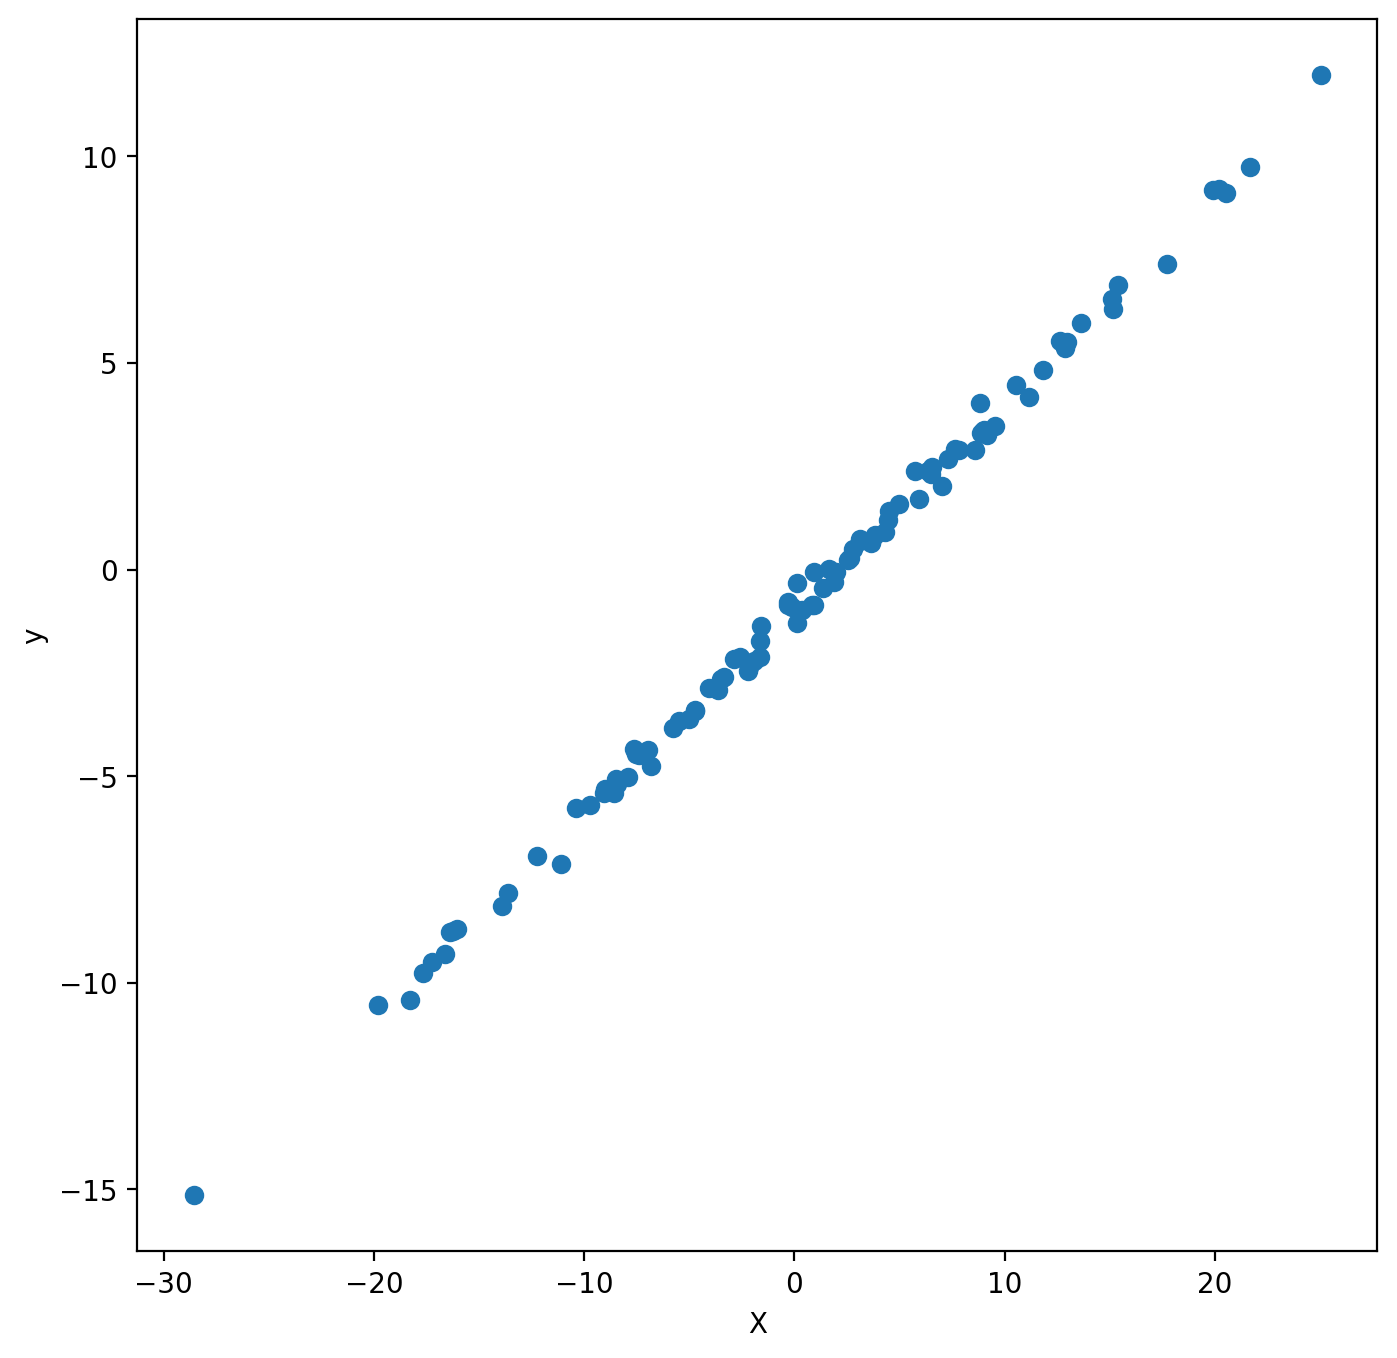

In [102]:
ax = subplots(figsize=(8, 8), dpi=200)[1]
ax.scatter(X, Y)
ax.set_xlabel("X")
ax.set_ylabel("y")

In [103]:
gen_df = pd.DataFrame({"x": X,
                       "y": Y})

In [106]:
X_transformed = MS(["x"]).fit_transform(gen_df)
y = gen_df["y"]
model_11 = sm.OLS(y, X_transformed)
result_gen_less_noise = model_11.fit()
summarize(result_gen_less_noise)

,coef,std err,t,P>|t|
intercept,-0.9732,0.025,-38.344,0.0
x,0.4960,0.002,200.802,0.0


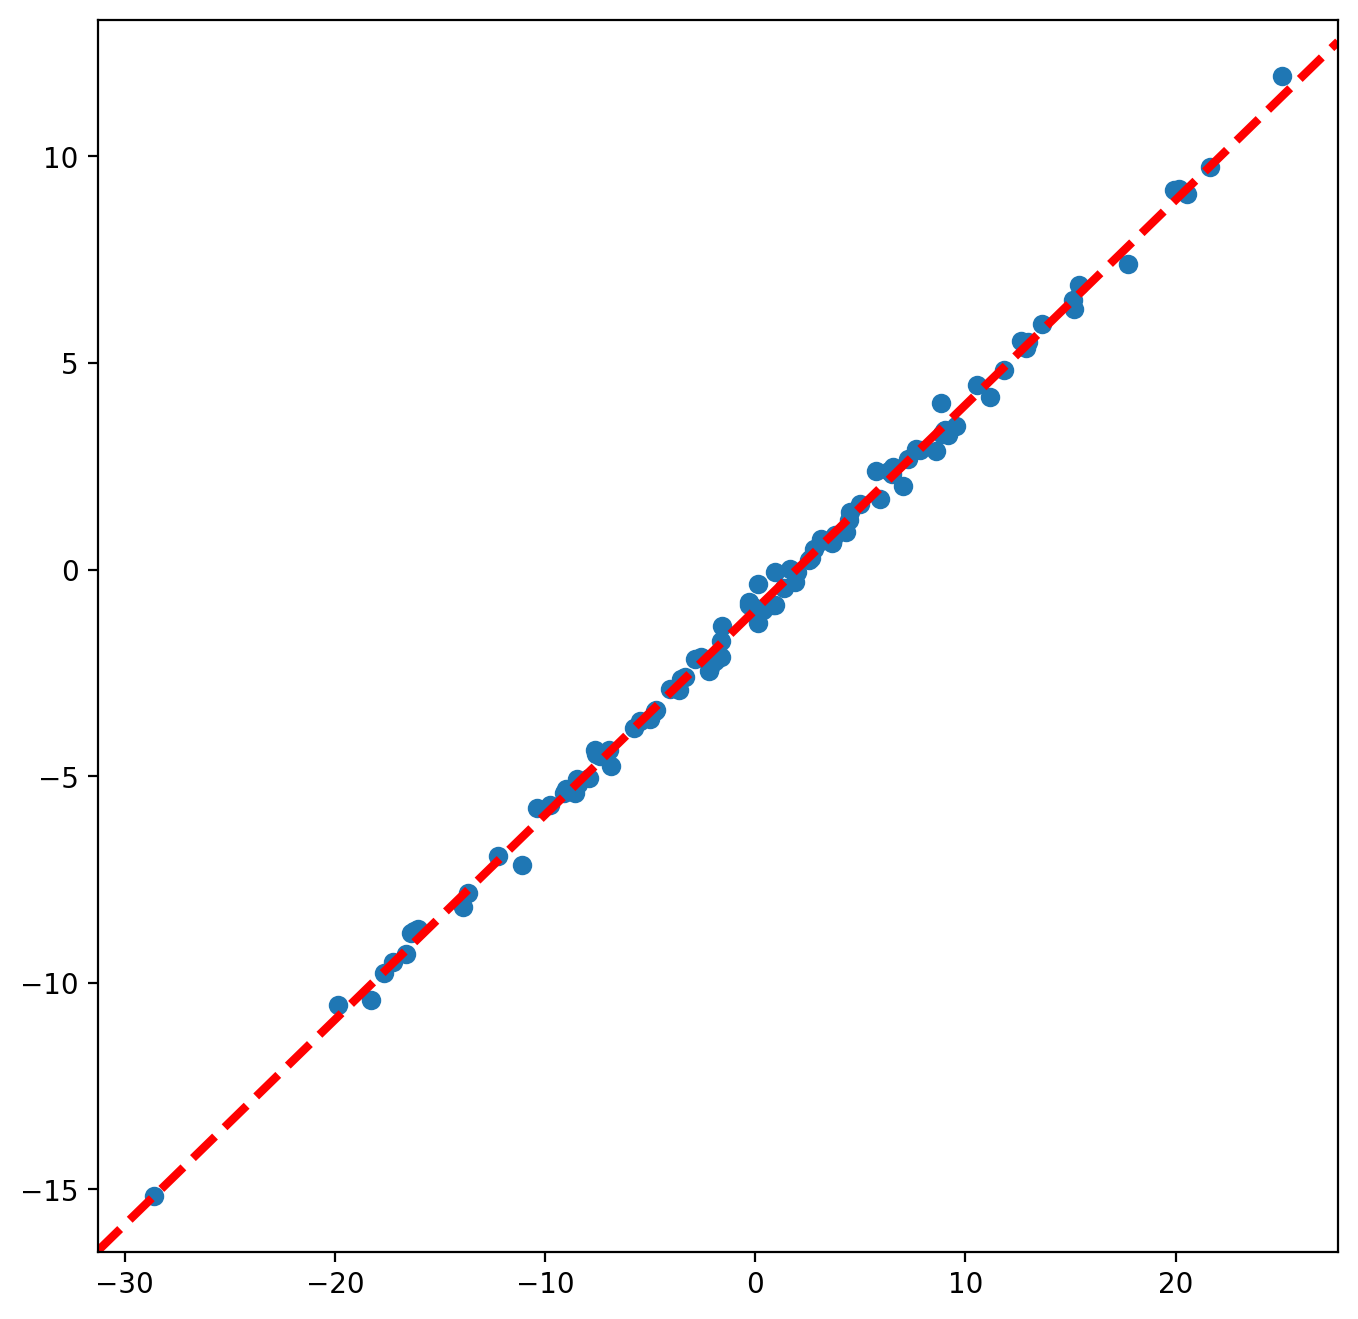

In [107]:
ax = subplots(figsize=(8,8), dpi=200)[1]
ax.scatter(gen_df["x"], y)
ax.axline(xy1=(0, result_gen_less_noise.params[0]), slope=result_gen_less_noise.params[1], color="r", linestyle="--", linewidth=3)

## (i)

In [110]:
X = rng.normal(loc=0, scale=1, size=100)
eps = rng.normal(loc=0, scale=1, size=100)
Y = -1 + (0.5 * X) + eps


Text(0, 0.5, 'y')

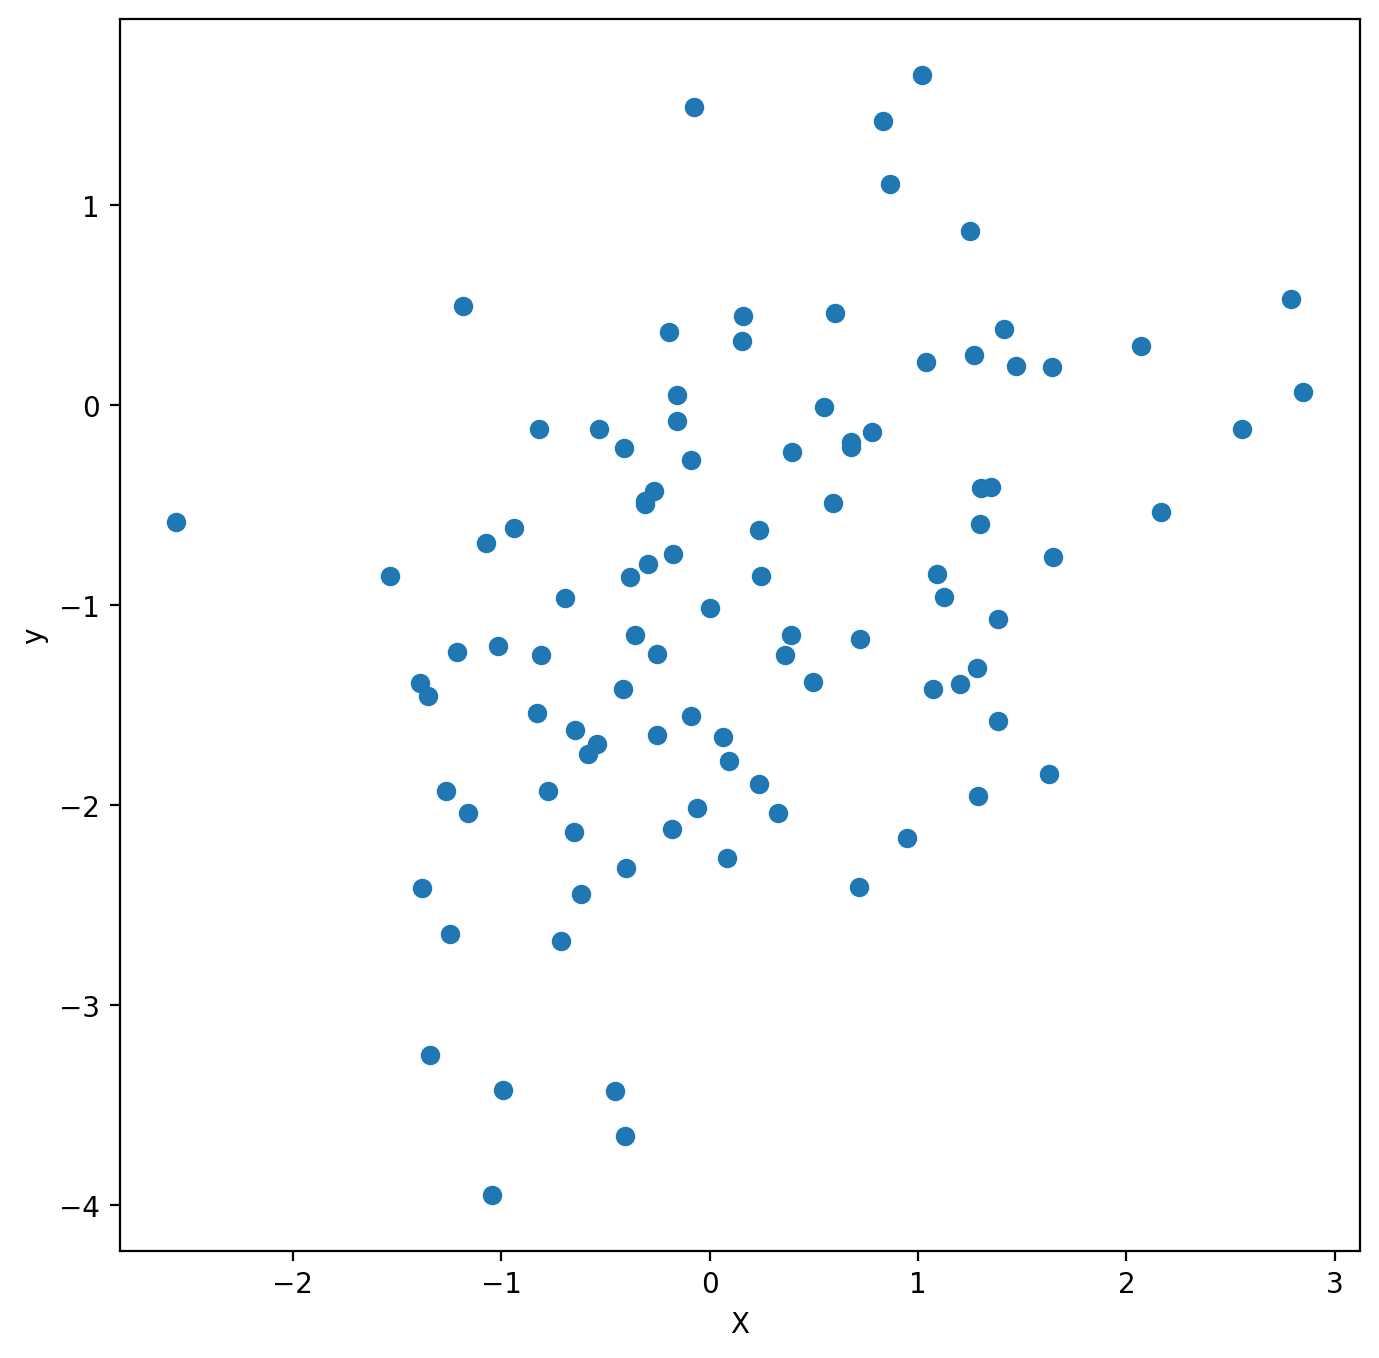

In [111]:
ax = subplots(figsize=(8, 8), dpi=200)[1]
ax.scatter(X, Y)
ax.set_xlabel("X")
ax.set_ylabel("y")

In [112]:
gen_df = pd.DataFrame({"x": X,
                       "y": Y})

In [113]:
X_transformed = MS(["x"]).fit_transform(gen_df)
y = gen_df["y"]
model_12 = sm.OLS(y, X_transformed)
result_gen_more_noise = model_12.fit()
summarize(result_gen_more_noise)

,coef,std err,t,P>|t|
intercept,-1.0486,0.104,-10.036,0.0
x,0.4460,0.100,4.472,0.0


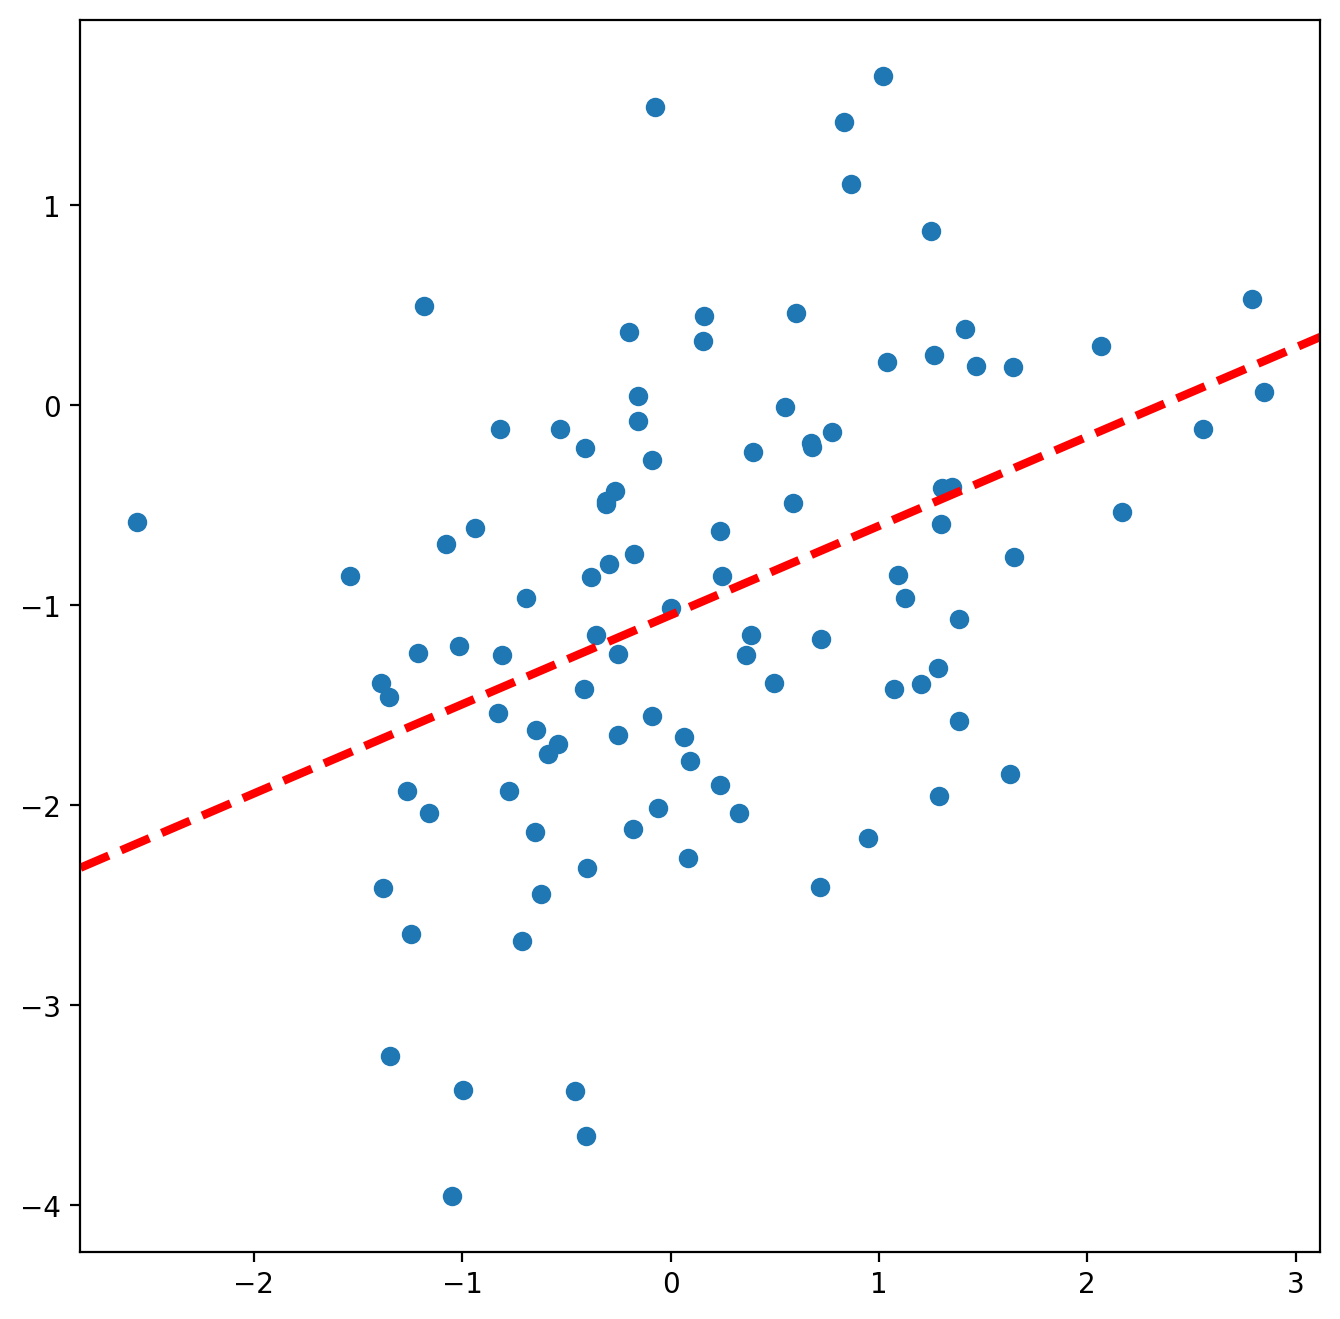

In [114]:
ax = subplots(figsize=(8,8), dpi=200)[1]
ax.scatter(gen_df["x"], y)
ax.axline(xy1=(0, result_gen_more_noise.params[0]), slope=result_gen_more_noise.params[1], color="r", linestyle="--", linewidth=3)

# 14

## (a)

In [131]:
rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

## (b)

Text(0, 0.5, 'x2')

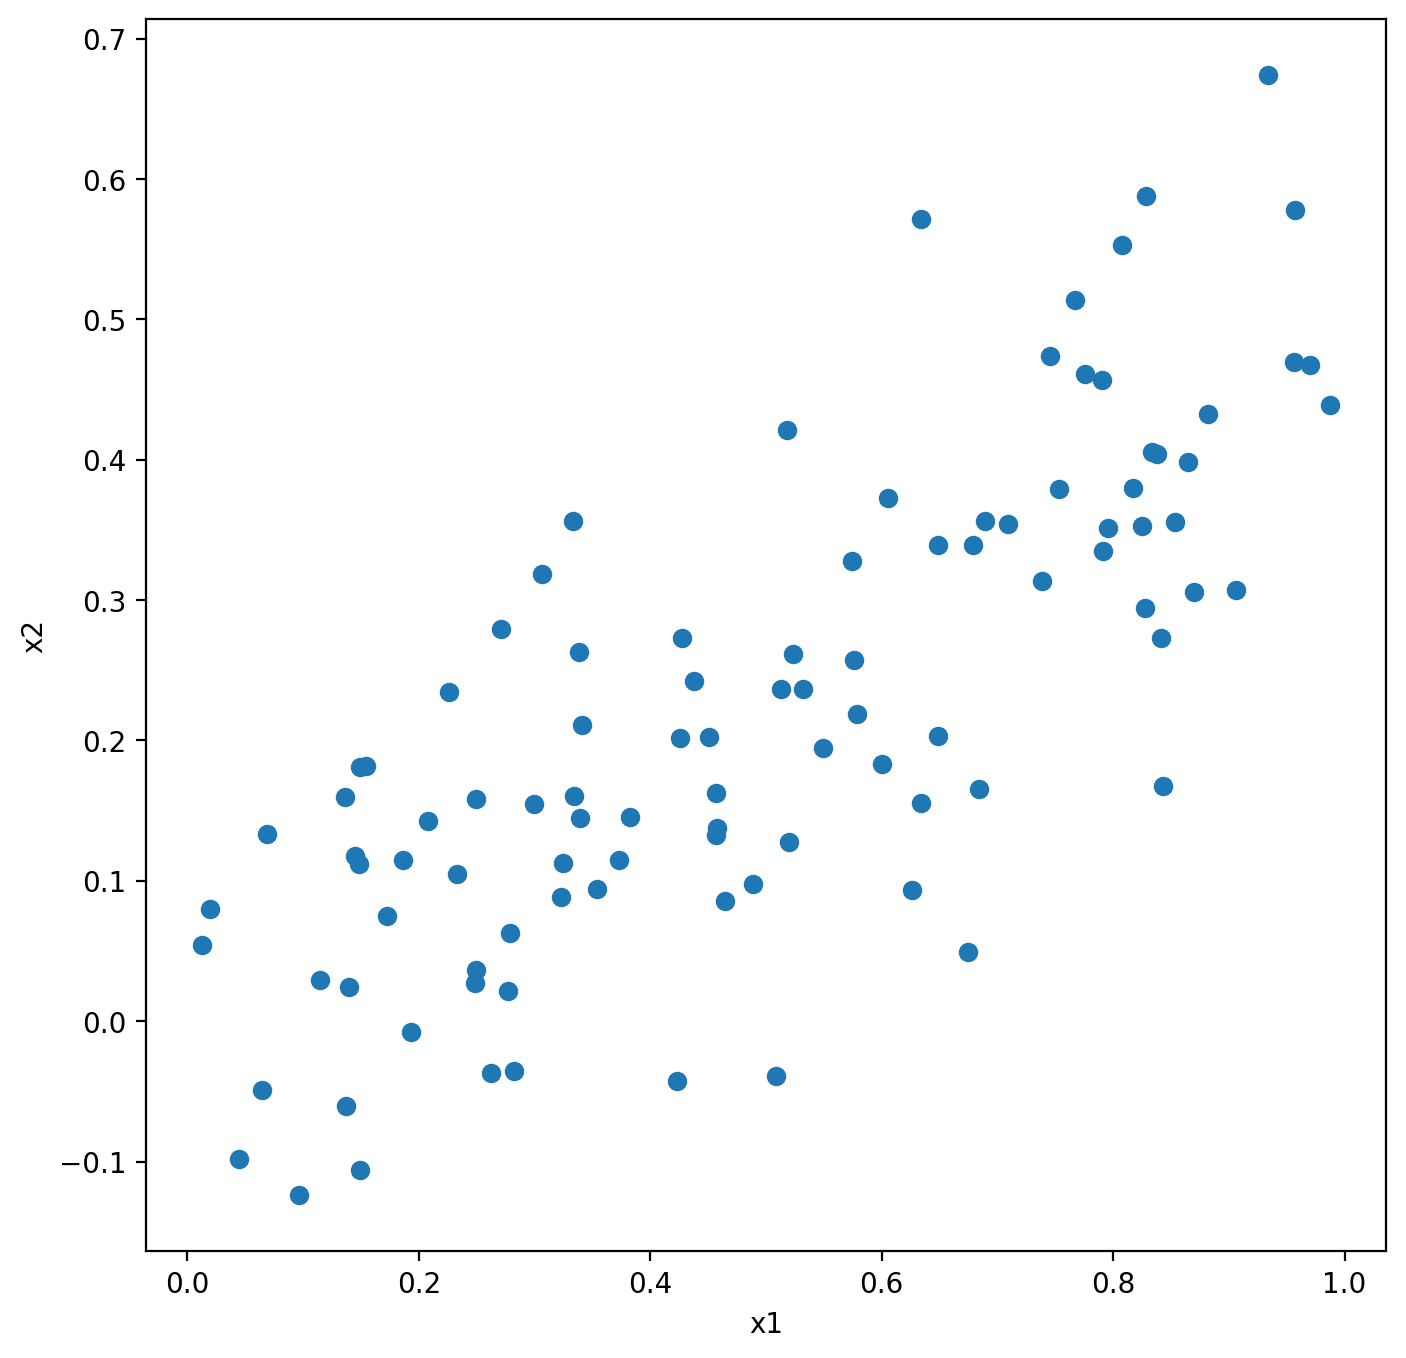

In [132]:
ax = subplots(figsize=(8, 8), dpi=200)[1]
ax.scatter(x1, x2)
ax.set_xlabel("x1")
ax.set_ylabel("x2")

## (c)

In [133]:
colinear_df = pd.DataFrame({"x1": x1,
                            "x2": x2,
                            "y": y})

In [134]:
X_transformed = MS(["x1", "x2"]).fit_transform(colinear_df)
y = colinear_df["y"]
model_13 = sm.OLS(y, X_transformed)
result_collinear = model_13.fit()
summarize(result_collinear)

,coef,std err,t,P>|t|
intercept,1.9579,0.190,10.319,0.000
x1,1.6154,0.527,3.065,0.003
x2,0.9428,0.831,1.134,0.259


## (d)

In [135]:
X_transformed = MS(["x1"]).fit_transform(colinear_df)
y = colinear_df["y"]
model_14 = sm.OLS(y, X_transformed)
result_collinear_x1 = model_14.fit()
summarize(result_collinear_x1)

,coef,std err,t,P>|t|
intercept,1.9371,0.189,10.242,0.0
x1,2.0771,0.335,6.196,0.0


In [136]:
X_transformed = MS(["x2"]).fit_transform(colinear_df)
y = colinear_df["y"]
model_14 = sm.OLS(y, X_transformed)
result_collinear_x2 = model_14.fit()
summarize(result_collinear_x2)

,coef,std err,t,P>|t|
intercept,2.3239,0.154,15.124,0.0
x2,2.9103,0.550,5.291,0.0


## (g)

In [137]:
x1 = np.concatenate([x1, [0.1]])
x2 = np.concatenate([x2, [0.8]])
y = np.concatenate([y, [6]])

In [138]:
colinear_df_new = pd.DataFrame({"x1": x1,
                            "x2": x2,
                            "y": y})

In [139]:
X_transformed = MS(["x1", "x2"]).fit_transform(colinear_df_new)
y = colinear_df_new["y"]
model_15 = sm.OLS(y, X_transformed)
result_collinear_new = model_15.fit()
summarize(result_collinear_new)

,coef,std err,t,P>|t|
intercept,2.0618,0.192,10.720,0.000
x1,0.8575,0.466,1.838,0.069
x2,2.2663,0.705,3.216,0.002


100

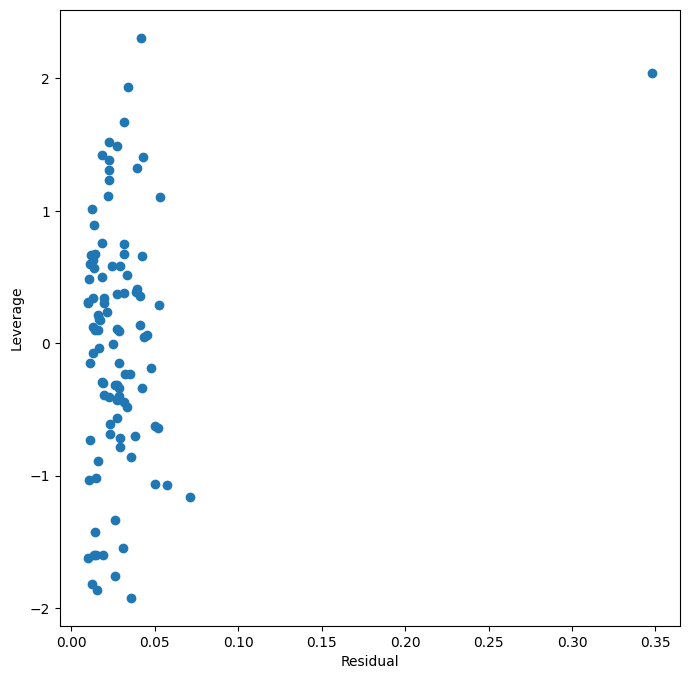

In [140]:
leverage_points = result_collinear_new.get_influence()
ax = subplots(figsize=(8, 8))[1]
ax.scatter(leverage_points.hat_matrix_diag, result_collinear_new.resid)
ax.set_xlabel("Residual")
ax.set_ylabel("Leverage")
np.argmax(leverage_points.hat_matrix_diag)

# 15

In [142]:
boston = load_data("Boston")
boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

## (i)

In [144]:
x = MS(["zn"]).fit_transform(boston)
y = boston["crim"]
model_16 = sm.OLS(y, x)
results_zn = model_16.fit()
summarize(results_zn)

,coef,std err,t,P>|t|
intercept,4.4537,0.417,10.675,0.0
zn,-0.0739,0.016,-4.594,0.0


In [145]:
x = MS(["indus"]).fit_transform(boston)
y = boston["crim"]
model_17 = sm.OLS(y, x)
results_indus = model_17.fit()
summarize(results_indus)

,coef,std err,t,P>|t|
intercept,-2.0637,0.667,-3.093,0.002
indus,0.5098,0.051,9.991,0.000


In [147]:
x = MS(["chas"]).fit_transform(boston)
y = boston["crim"]
model_18 = sm.OLS(y, x)
results_chas = model_18.fit()
summarize(results_chas)

,coef,std err,t,P>|t|
intercept,3.7444,0.396,9.453,0.000
chas,-1.8928,1.506,-1.257,0.209


In [149]:
x = MS(["nox"]).fit_transform(boston)
y = boston["crim"]
model_19 = sm.OLS(y, x)
results_nox = model_19.fit()
summarize(results_nox)

,coef,std err,t,P>|t|
intercept,-13.7199,1.699,-8.073,0.0
nox,31.2485,2.999,10.419,0.0


In [150]:
x = MS(["rm"]).fit_transform(boston)
y = boston["crim"]
model_20 = sm.OLS(y, x)
results_rm = model_20.fit()
summarize(results_rm)

,coef,std err,t,P>|t|
intercept,20.4818,3.364,6.088,0.0
rm,-2.6841,0.532,-5.045,0.0


In [151]:
x = MS(["age"]).fit_transform(boston)
y = boston["crim"]
model_21 = sm.OLS(y, x)
results_age = model_21.fit()
summarize(results_age)

,coef,std err,t,P>|t|
intercept,-3.7779,0.944,-4.002,0.0
age,0.1078,0.013,8.463,0.0


In [152]:
x = MS(["dis"]).fit_transform(boston)
y = boston["crim"]
model_22 = sm.OLS(y, x)
results_dis = model_22.fit()
summarize(results_dis)

,coef,std err,t,P>|t|
intercept,9.4993,0.730,13.006,0.0
dis,-1.5509,0.168,-9.213,0.0


In [153]:
x = MS(["rad"]).fit_transform(boston)
y = boston["crim"]
model_23 = sm.OLS(y, x)
results_rad = model_23.fit()
summarize(results_rad)

,coef,std err,t,P>|t|
intercept,-2.2872,0.443,-5.157,0.0
rad,0.6179,0.034,17.998,0.0


In [154]:
x = MS(["tax"]).fit_transform(boston)
y = boston["crim"]
model_24 = sm.OLS(y, x)
results_tax = model_24.fit()
summarize(results_tax)

,coef,std err,t,P>|t|
intercept,-8.5284,0.816,-10.454,0.0
tax,0.0297,0.002,16.099,0.0


In [155]:
x = MS(["ptratio"]).fit_transform(boston)
y = boston["crim"]
model_25 = sm.OLS(y, x)
results_ptratio = model_25.fit()
summarize(results_ptratio)

,coef,std err,t,P>|t|
intercept,-17.6469,3.147,-5.607,0.0
ptratio,1.1520,0.169,6.801,0.0


In [156]:
x = MS(["lstat"]).fit_transform(boston)
y = boston["crim"]
model_26 = sm.OLS(y, x)
results_lstat = model_26.fit()
summarize(results_lstat)

,coef,std err,t,P>|t|
intercept,-3.3305,0.694,-4.801,0.0
lstat,0.5488,0.048,11.491,0.0


In [157]:
x = MS(["medv"]).fit_transform(boston)
y = boston["crim"]
model_27 = sm.OLS(y, x)
results_medv = model_27.fit()
summarize(results_medv)

,coef,std err,t,P>|t|
intercept,11.7965,0.934,12.628,0.0
medv,-0.3632,0.038,-9.460,0.0


In [158]:
columns = boston.drop("crim", axis=1)
x = MS(columns).fit_transform(boston)
y = boston["crim"]
model_28 = sm.OLS(y, x)
results_all = model_28.fit()
summarize(results_all)

,coef,std err,t,P>|t|
intercept,13.7784,7.082,1.946,0.052
zn,0.0457,0.019,2.433,0.015
indus,-0.0584,0.084,-0.698,0.486
chas,-0.8254,1.183,-0.697,0.486
nox,-9.9576,5.290,-1.882,0.060
rm,0.6289,0.607,1.036,0.301
age,-0.0008,0.018,-0.047,0.962
dis,-1.0122,0.282,-3.584,0.000
rad,0.6125,0.088,6.997,0.000
tax,-0.0038,0.005,-0.730,0.466


In [159]:
boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

In [161]:
results_all.params

intercept    13.778394
zn            0.045710
indus        -0.058350
chas         -0.825378
nox          -9.957587
rm            0.628911
age          -0.000848
dis          -1.012247
rad           0.612465
tax          -0.003776
ptratio      -0.304073
lstat         0.138801
medv         -0.220056
dtype: float64

In [164]:
coeff_df = pd.DataFrame({"single": [results_zn.params[1],
                                    results_indus.params[1],
                                    results_chas.params[1],
                                    results_nox.params[1],
                                    results_rm.params[1],
                                    results_age.params[1],
                                    results_dis.params[1],
                                    results_rad.params[1],
                                    results_tax.params[1],
                                    results_ptratio.params[1],
                                    results_lstat.params[1],
                                    results_medv.params[1]],
                        "multi": results_all.params[1:]})

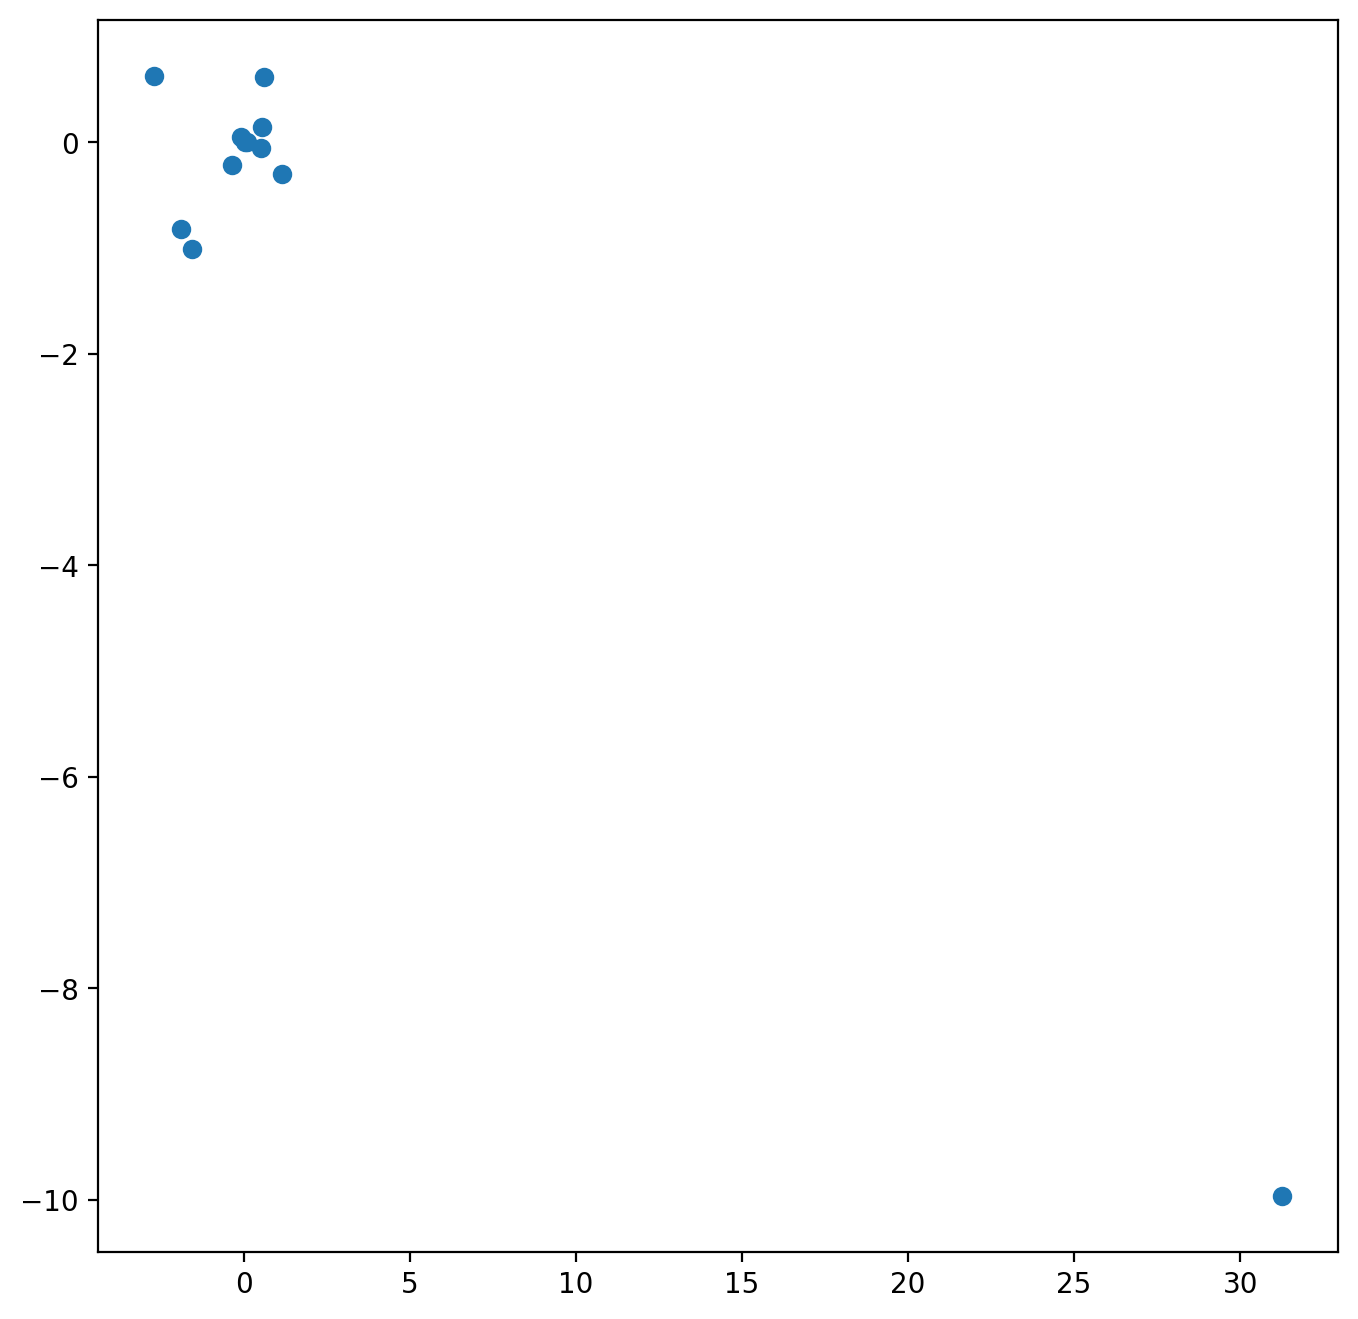

In [166]:
ax = subplots(figsize=(8,8), dpi=200)[1]
ax.scatter(x=coeff_df["single"], y=coeff_df["multi"])